<a href="https://colab.research.google.com/github/deepintomlf/mlfbook/blob/master/Chapter5_NeuralNetwork/Section5.4_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


This demo is to apply LSTM to the limit order book data in order to forecast the direction of the next price movement.

In this demo, we will cover 

1.   the recurrent neural network and its variants LSTM
2.   the application of LSTM to forecast the fugure price movement.
3.   the usage of Keras to implement LSTM on the empirical data.




# Supervised Learning
**Regression Problem Setting**

Dataset: $\mathcal{D} = \{(x_{i}, y_{i})\}_{i = 1}^{N}$ such that 
\begin{eqnarray*}
y_{i} = f(x_{i}) + \varepsilon_{i},
\end{eqnarray*}
where $x_{i}:= (x_{i}^{(1)}, \cdots, x_{i}^{(d)}) \in \mathbb{R}^{d}$, $\varepsilon_{i}$ is iid with $\mathbb{E}[\varepsilon_{i} \vert x_{i}] = 0$. 

**Goal** 

For new given input $x$, predict the corresponding $y$.

## Regression v.s. Classification

In Regression, the output is a continuous variable.

In Classification, the output is categorical:

Integer coding;
One-Hot Encoding.
Example: 3 classes in total: "A", "B", "C".

"A" - 1; "B" - 2, "C" - 3 ;
"A" - 001; "B" - 010; "C" - 100.

![Regression_vs_Classification](https://docs.google.com/uc?export=download&id=1YnTjuiTmG5uGzVtj66-ma0bFtqZnT7Z-)


## Recurrent Neural Network (RNN)
![alt text](https://docs.google.com/uc?export=download&id=13Zo2LzEM_D032k_l-E05LSD2wNZGIP03)



**RNN Model:**

$\bullet$    Input Layer $(x_{t})_{t = 1}^{T}$

$\bullet$  Hidden Layer $(s_{t})_{t = 1}^{T}$:
\begin{eqnarray*}
s_{t} = h({\color{blue}U}x_{t} + {\color{blue}W}s_{t-1}).
\end{eqnarray*}
$\bullet$  Output Layer $(o_{t})_{t = 1}^{T}$:
\begin{eqnarray*}
o_{t} = g({\color{blue}V}s_{t}).
\end{eqnarray*}
where ${(\color{blue}U}, {\color{blue}W}, {\color{blue}V })$ are RNN parameters to learn from data.





## Long Short Term Memory (LSTM) 
![alt text](https://docs.google.com/uc?export=download&id=11bSZaP3i1P9mvW1HLv__d71lzATaqlvz)

\begin{eqnarray*}
&&f_{t} = \sigma_{g}(W_{f}x_{t} + U_{f}h_{t-1} + b_{f});\\
&&i_{t} = \sigma_{g}(W_{i}x_{t} + U_{i}h_{t-1} + b_{i})\\
&& o_{t} = \sigma_{g}(W_{o}x_{t} + U_{o}h_{t-1} + b_{o})\\
&&c_{t} = f_{t} \circ c_{t-1} + i_{t} \circ \sigma_{c}(W_{c}x_{t} + U_{c}h_{t-1} + b_{c})\\
&& h_{t} = o_{t} \circ \sigma_{h}(c_{t})
\end{eqnarray*}
where the inital values are $c_{0} = h_{0} =0$ and the operator $\circ$ denotes the Hadamard product (elementwise product) and 



*   $x_{t} \in \mathbb{R}^{d}:$ input vector of the LSTM unit;
*   $f_{t} \in \mathbb{R}^{h}:$ forget gate's activation vector;
*   $i_{t} \in \mathbb{R}^{h}:$ output gate's activation vector;
*   $o_{t} \in \mathbb{R}^{h}:$ hidden state vector also known as output vector of the LSTM unit;
*   $c_{t} \in \mathbb{R}^{h}$: cell state vector;
*   $W \in \mathbb{R}^{h \times d}, U \in \mathbb{R}^{h \times h}$ and $b \in \mathbb{R}^{h}$: weight matrices and bias vector parameters which need  need to be learned during training
where the superscripts $d$ and $h$ refer to the number of input features and number of hidden units, respectively. 

Typically the activation functions are chosen as follows:
*  $\sigma _{g}$ is a sigmoid function;
*   $\sigma_{c}$ is hyperbolic tangent function;
*   $\sigma_{h}$ is a hyperbolic tangent function. 


**Sucessful Application of RNN and its variants, e.g. LSTM:**

1.   Speech Recognition;
2.   Natural Language Processing;
3.   Machine Translation.


## RNN Classification##
The input $x$ is a multi-dimensional vector; 

The ouput $y$ is a one-hot respresenation of the class. 


The number of neurons in the output layer is the total number of classes. 

The $j^{th}$ neurons in the output layer represents the probability of the output(label) being class $j$.  

 The **cross entropy **loss function is defined as follows:

\begin{eqnarray*}
L(\theta \vert \mathcal{D}) = - \frac{1}{N}\sum_{i =1}^{N} \sum_{k} \mathbb{1}( y_{i}=\text{ class }k) \log(p(y_{i} =\text{ class }k \vert x_{i})) 
\end{eqnarray*}

Note: The cross entropy between two probability distributions $p$ and $q$ is defined as 
\begin{eqnarray*}
H(p, q) =- \sum_{x} p(x)\log(q(x)).
\end{eqnarray*}

$L(\theta \vert \mathcal{D}) $ can be reformulated as 

\begin{eqnarray*}
L(\theta \vert \mathcal{D}) = - \frac{1}{N} \langle  y_{i}, \log(p_{\theta }(  \cdot \vert x_{i})) \rangle 
\end{eqnarray*}

#Pipelines of Supervised Learning Algorithms# 

The piplelines of the supervised learning algorithms are summarized as follows:

1.   Import Datasets;
2.   Take a look at the dataset (Statistical Analysis/Visualization);
3.    Pre-process the dataset to prepare for the training process (normalization/reshape data);
4.    Train a model;
5.    Validate a model;
6.    Cross Validation. 


# Application on High Frequency Financial Data Forecasting

In the following, let us consider the problem of forecasting the direction of future price movements using the previous lagged values of limit order book information (price level and the volume).

[1] Sirignano, J. and Cont, R., 2018. Universal features of price formation in financial markets: perspectives from Deep Learning.

**Input: **$X_{t}:=(LOB_{t-p+1}, LOB_{t-p+2}, \cdots, LOB_{t}$,

where $LOB_{t} = (AskPrice_{1}(t), AskVol_{1}(t), BidPrice_{1}(t), BidVol_{1}(t), \cdots, AskPrice_{10}(t), AskVol_{10}(t), BidPrice_{10}(t), BidVol_{10}(t))$ 

**Output: **$Y_{t}:=\mathbf{1}(MidPrice(t+1)>MidPrice(t))$

**Model:** $Y_t = f(X_{t}) + \varepsilon_{t}$

## Import High Frequency Financial Data

The data is downloaded from LOBSTER.

In [6]:
from google.colab import drive
drive.mount('/gdrive')


Mounted at /gdrive


In [7]:
cd /gdrive/My Drive/Colab Notebooks/High Frequency Data/

/gdrive/My Drive/Colab Notebooks/High Frequency Data


In [8]:
# import numpy
import numpy as np
# import pandas
import pandas as pd
# import tensorflow + keras ...
import tensorflow as tf
import keras
from keras.utils import np_utils
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.merge import concatenate
from keras import optimizers
from keras import metrics
import keras.backend as K
from keras.models import Sequential
# import matplotlib...
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import matplotlib
import pylab

In [9]:
def import_orderbook(filedir):
  orderbook0 = pd.read_csv(filedir,header=None).values.astype(float)
  N_col = np.shape(orderbook0)[1]  
  orderbook0[:,0::2]=(orderbook0[:,0::2]/1e4) # we normalize the price of the order book by dividing a factor 10000.
  str_sets = []
  for i in range(int(N_col/4)):
    str_sets.append('ask price '+str(i+1))
    str_sets.append('ask size '+str(i+1))
    str_sets.append('bid price '+str(i+1))
    str_sets.append('bid size '+str(i+1))    
  df_orderbook0 =  pd.DataFrame(orderbook0, columns = str_sets)
  return orderbook0, df_orderbook0 

def import_message(filedir):
  message=pd.read_csv(filedir,header=None).values
  df_message = pd.DataFrame(message, columns=['Time', 'Type', 'Order ID', 'Size', 'Price', 'Direction'])
  df_message[['Type', 'Order ID', 'Size', 'Price', 'Direction']] = df_message[['Type', 'Order ID', 'Size', 'Price', 'Direction']].astype('int')
  return message, df_message
  
orderbook, df_orderbook = import_orderbook('orderbook.csv')
message, df_message = import_message('message.csv')

df_orderbook.head()
print('dimension of the data in orderbook.csv = {}'.format(orderbook.shape))
print('dimension of the data in message.csv = {}'.format(message.shape))

dimension of the data in orderbook.csv = (269748, 40)
dimension of the data in message.csv = (269748, 6)


In [10]:
df_orderbook.head()

,ask price 1,ask size 1,bid price 1,bid size 1,ask price 2,ask size 2,bid price 2,bid size 2,ask price 3,ask size 3,bid price 3,bid size 3,ask price 4,ask size 4,bid price 4,bid size 4,ask price 5,ask size 5,bid price 5,bid size 5,ask price 6,ask size 6,bid price 6,bid size 6,ask price 7,ask size 7,bid price 7,bid size 7,ask price 8,ask size 8,bid price 8,bid size 8,ask price 9,ask size 9,bid price 9,bid size 9,ask price 10,ask size 10,bid price 10,bid size 10
0,223.95,100.0,223.18,100.0,223.99,100.0,223.07,200.0,224.00,220.0,223.04,100.0,224.25,100.0,223.00,10.0,224.40,547.0,222.62,100.0,224.54,100.0,221.30,4000.0,224.89,100.0,220.40,100.0,226.77,100.0,220.25,5000.0,229.43,100.0,220.20,100.0,229.80,100.0,218.97,100.0
1,223.95,100.0,223.81,21.0,223.99,100.0,223.18,100.0,224.00,220.0,223.07,200.0,224.25,100.0,223.04,100.0,224.40,547.0,223.00,10.0,224.54,100.0,222.62,100.0,224.89,100.0,221.30,4000.0,226.77,100.0,220.40,100.0,229.43,100.0,220.25,5000.0,229.80,100.0,220.20,100.0
2,223.95,100.0,223.81,21.0,223.96,20.0,223.18,100.0,223.99,100.0,223.07,200.0,224.00,220.0,223.04,100.0,224.25,100.0,223.00,10.0,224.40,547.0,222.62,100.0,224.54,100.0,221.30,4000.0,224.89,100.0,220.40,100.0,226.77,100.0,220.25,5000.0,229.43,100.0,220.20,100.0
3,223.95,100.0,223.81,21.0,223.96,20.0,223.75,100.0,223.99,100.0,223.18,100.0,224.00,220.0,223.07,200.0,224.25,100.0,223.04,100.0,224.40,547.0,223.00,10.0,224.54,100.0,222.62,100.0,224.89,100.0,221.30,4000.0,226.77,100.0,220.40,100.0,229.43,100.0,220.25,5000.0
4,223.95,100.0,223.81,21.0,223.96,20.0,223.75,100.0,223.99,100.0,223.18,100.0,224.00,233.0,223.07,200.0,224.25,100.0,223.04,100.0,224.40,547.0,223.00,10.0,224.54,100.0,222.62,100.0,224.89,100.0,221.30,4000.0,226.77,100.0,220.40,100.0,229.43,100.0,220.25,5000.0


In [11]:
df_message.head(10)

,Time,Type,Order ID,Size,Price,Direction
0,34200.017460,5,0,1,2238200,-1
1,34200.189608,1,11885113,21,2238100,1
2,34200.189608,1,3911376,20,2239600,-1
3,34200.189608,1,11534792,100,2237500,1
4,34200.189608,1,1365373,13,2240000,-1
5,34200.189608,1,11474176,2,2236500,1
6,34200.189608,1,1847685,100,2240000,-1
7,34200.189608,1,3920359,15,2236000,1
8,34200.189608,1,3578212,4,2240000,-1
9,34200.189608,1,4632045,100,2235000,1


	Name: 	TICKER_Year-Month-Day_StartTime_EndTime_message_LEVEL.csv 	
		
		StartTime and EndTime give the theoretical beginning 
		and end time of the output file in milliseconds after 		
		mid night. LEVEL refers to the number of levels of the 
		requested limit order book.


	Columns:
	
	    1.) Time: 		
				Seconds after midnight with decimal 
				precision of at least milliseconds 
				and up to nanoseconds depending on 
				the requested period
	    2.) Type:
				1: Submission of a new limit order
				2: Cancellation (Partial deletion 
				   of a limit order)
				3: Deletion (Total deletion of a limit order)
				4: Execution of a visible limit order			   	 
				5: Execution of a hidden limit order
				7: Trading halt indicator 				   
				   (Detailed information below)
	    3.) Order ID: 	
				Unique order reference number 
				(Assigned in order flow)
	    4.) Size: 		
				Number of shares
	    5.) Price: 		
				Dollar price times 10000 
				(i.e., A stock price of $91.14 is given 
				by 911400)
	    6.) Direction:
				-1: Sell limit order
				1: Buy limit order
				
				Note: 
				Execution of a sell (buy) limit
				order corresponds to a buyer (seller) 
				initiated trade, i.e. Buy (Sell) trade.
										
						

## Preprocessing the Dataset 

In [12]:
# Remove the events which does not have mid price change.

def RemoveNoNextPriceChangeEvent(df_orderbook):
  orderbook = df_orderbook.values 
  midprice=(orderbook[:,0]+orderbook[:,2])/2
  simple_return = midprice[1:]-midprice[:-1]
  sign_vec = np.sign(simple_return)
  index0 = np.where(sign_vec!=0)
  print(midprice[0:10])
  print(index0[0:10])
  orderbook = orderbook[:-1, :]
  sign_vec = sign_vec[index0[0]]
  sign_vec = sign_vec*0.5+0.5
  sign_vec = sign_vec.astype('int')
  #label = keras.utils.to_categorical(sign_vec, num_classes=2,dtype='float32')
  label = np_utils.to_categorical(sign_vec, num_classes=2,dtype='float32')
  df_orderbook = df_orderbook.iloc[index0]
  orderbook = df_orderbook.values
  return orderbook, df_orderbook, label

orderbook, df_orderbook, label = RemoveNoNextPriceChangeEvent(df_orderbook)

df_orderbook.head()

print('dimension of the data after removing no next price change = {}'.format(orderbook.shape))

print('dimension of the label for the next price movement after removing no next price change = {}'.format(label.shape))

[223.565 223.88  223.88  223.88  223.88  223.88  223.88  223.88  223.88
 223.88 ]
(array([     0,     31,     43, ..., 269743, 269745, 269746]),)
dimension of the data after removing no next price change = (27557, 40)
dimension of the label for the next price movement after removing no next price change = (27557, 2)


In [13]:
df_orderbook.head()

,ask price 1,ask size 1,bid price 1,bid size 1,ask price 2,ask size 2,bid price 2,bid size 2,ask price 3,ask size 3,bid price 3,bid size 3,ask price 4,ask size 4,bid price 4,bid size 4,ask price 5,ask size 5,bid price 5,bid size 5,ask price 6,ask size 6,bid price 6,bid size 6,ask price 7,ask size 7,bid price 7,bid size 7,ask price 8,ask size 8,bid price 8,bid size 8,ask price 9,ask size 9,bid price 9,bid size 9,ask price 10,ask size 10,bid price 10,bid size 10
0,223.95,100.0,223.18,100.0,223.99,100.0,223.07,200.0,224.00,220.0,223.04,100.0,224.25,100.0,223.0,10.0,224.40,547.0,222.62,100.0,224.54,100.0,221.30,4000.0,224.89,100.0,220.40,100.0,226.77,100.0,220.25,5000.0,229.43,100.0,220.20,100.0,229.80,100.0,218.97,100.0
31,223.95,100.0,223.81,21.0,223.96,20.0,223.75,100.0,223.99,100.0,223.65,2.0,224.00,1451.0,223.6,15.0,224.24,20.0,223.50,100.0,224.25,100.0,223.49,50.0,224.30,500.0,223.18,100.0,224.40,547.0,223.07,200.0,224.49,100.0,223.04,100.0,224.50,5.0,223.00,10.0
43,223.95,100.0,223.75,74.0,223.96,306.0,223.65,2.0,223.99,100.0,223.60,15.0,224.00,1451.0,223.5,100.0,224.24,20.0,223.49,50.0,224.25,100.0,223.07,200.0,224.30,500.0,223.00,10.0,224.40,447.0,222.62,100.0,224.49,100.0,221.30,4000.0,224.50,5.0,220.40,100.0
45,223.96,286.0,223.75,74.0,223.99,100.0,223.65,2.0,224.00,1451.0,223.60,15.0,224.24,20.0,223.5,100.0,224.25,100.0,223.49,50.0,224.30,500.0,223.07,200.0,224.40,447.0,223.00,10.0,224.49,100.0,222.62,100.0,224.50,5.0,221.30,4000.0,224.89,100.0,220.40,100.0
47,223.99,100.0,223.75,74.0,224.00,1451.0,223.65,2.0,224.24,20.0,223.62,286.0,224.25,100.0,223.6,15.0,224.30,500.0,223.50,100.0,224.40,447.0,223.49,50.0,224.49,100.0,223.07,200.0,224.50,5.0,223.00,10.0,224.89,100.0,222.62,100.0,226.77,100.0,221.30,4000.0


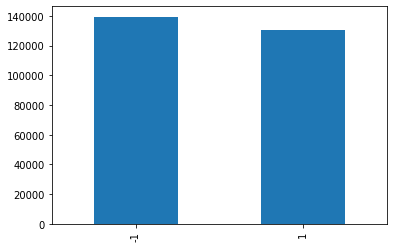

In [14]:
count_message = df_message['Direction'].value_counts().sort_index()
count_message

count_message.plot(kind='bar')

## Prepare the data for LSTM

In [15]:
def P_Lagged_data(X,p):
  n=X.shape[0]
  LaggedX=np.zeros([n-p,p,X.shape[1]])
  for i in range(n-p):
    LaggedX[i,:,:]=X[i:(i+p),:]
  return(LaggedX)

def GenerateLaggedValueInputOutput(df_orderbook, label, p):
  orderbook = df_orderbook.values
  inputX = P_Lagged_data(orderbook,p) 
  outputY = label[p:]
  return inputX, outputY 

nTimes = df_orderbook.shape[0]
p = 50
inputX, outputY = GenerateLaggedValueInputOutput(df_orderbook, label, p)

print(inputX.shape)

print(outputY.shape)

(27507, 50, 40)
(27507, 2)


## Split the data into the train set and test set

In [16]:
from sklearn.model_selection import train_test_split
# It is import to set the shuffle flag to be False, as we would like to use the first 90% of data for the training and the rest for testing. 
# The default flag of train_test_split is True, in which case the testing data is randomly selected from the whole data.

X_train, X_test, y_train, y_test = train_test_split( inputX, outputY, test_size=0.1, shuffle = False)

In [17]:
print(y_train.shape)
sum(y_train[:,0])
print('the portion of positive direction in the train set= {}'.format(sum(y_train[:,0])/y_train.shape[0]))

(24756, 2)
the portion of positive direction in the train set= 0.5065034739053159


##Normalize the data

In [18]:
from sklearn import preprocessing

def Normalize3D_tensor_Data(X_train, X_test):
  dim_train = np.shape(X_train)
  print(dim_train)
  X_train_scaled = np.zeros(np.shape(X_train), dtype = float)
  X_test_scaled = np.zeros(np.shape(X_test), dtype = float)
  for i in range(dim_train[1]):
    scaler = preprocessing.StandardScaler().fit(X_train[:, i, :])
    X_train_scaled[:, i, :] = scaler.transform(X_train[:, i, :])  
    X_test_scaled[:, i, :] = scaler.transform(X_test[:, i, :])  
  return X_train_scaled, X_test_scaled
 
X_train_scaled, X_test_scaled = Normalize3D_tensor_Data(X_train, X_test)

(24756, 50, 40)


## Learning LSTM models 

### A simple LSTM model

In [24]:
import tensorflow as tf
from keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from keras import regularizers

def lstm0(input_shape, nodes, dropout):
    model=Sequential()
    model.add(LSTM(nodes,dropout=dropout,input_shape= input_shape,use_bias= True))
    model.add(Dense(10, activation='relu', use_bias= True))
    model.add(Dense(2,activation='softmax', use_bias= True))
    adam=tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=[metrics.categorical_accuracy])
    return(model)

print(X_train.shape)
print(y_train.shape)
model1 = lstm0(X_train_scaled.shape[1:], 30,0.15)

print(model1.summary())
hist1 = model1.fit(X_train_scaled , y_train,validation_split=0.1, batch_size=2000, epochs=50, shuffle=True,verbose=1)

scores = model1.evaluate(X_test_scaled, y_test, verbose=1)
print(scores)

(24756, 50, 40)
(24756, 2)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 30)                8520      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 22        
Total params: 8,852
Trainable params: 8,852
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
12/12 [==============================] - 3s 79ms/step - loss: 0.7156 - categorical_accuracy: 0.5031 - val_loss: 0.6953 - val_categorical_accuracy: 0.4867
Epoch 2/50
12/12 [==============================] - 0s 31ms/step - loss: 0.6952 - categorical_accuracy: 0.5104 - val_loss: 0.6940 - val_categorical_accuracy: 0.5145
Epoch 3/50
12/12 [==

In [25]:
model1.save('LightLSTM_model.h5')

In [26]:
from keras.models import load_model
model1 = load_model('LightLSTM_model.h5')
hist1 = model1.fit(X_train_scaled , y_train,validation_split=0.1, batch_size=200, epochs=50, shuffle=True,verbose=1)

Epoch 1/50
112/112 [==============================] - 3s 17ms/step - loss: 0.6632 - categorical_accuracy: 0.5942 - val_loss: 0.7091 - val_categorical_accuracy: 0.5376
Epoch 2/50
112/112 [==============================] - 1s 13ms/step - loss: 0.6612 - categorical_accuracy: 0.5964 - val_loss: 0.6722 - val_categorical_accuracy: 0.5804
Epoch 3/50
112/112 [==============================] - 1s 13ms/step - loss: 0.6562 - categorical_accuracy: 0.6052 - val_loss: 0.6916 - val_categorical_accuracy: 0.5444
Epoch 4/50
112/112 [==============================] - 2s 14ms/step - loss: 0.6554 - categorical_accuracy: 0.6074 - val_loss: 0.6727 - val_categorical_accuracy: 0.5796
Epoch 5/50
112/112 [==============================] - 1s 13ms/step - loss: 0.6517 - categorical_accuracy: 0.6121 - val_loss: 0.6741 - val_categorical_accuracy: 0.5771
Epoch 6/50
112/112 [==============================] - 1s 13ms/step - loss: 0.6505 - categorical_accuracy: 0.6115 - val_loss: 0.6741 - val_categorical_accuracy: 0.586

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


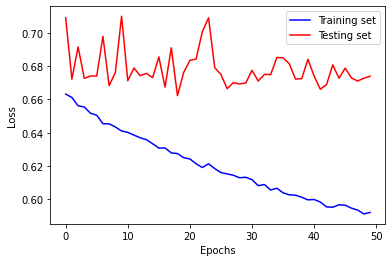

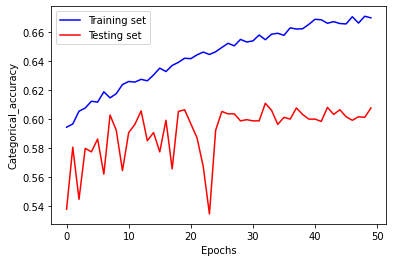

In [27]:
print(hist1.history.keys())

def plot_hist_var(hist, str_var):
  plt.figure()
  plt.plot(hist.history[str_var], 'b', linewidth=1.5)
  plt.plot(hist.history['val_'+str_var], 'r', linewidth=1.5)
  plt.legend(['Training set','Testing set'])
  plt.xlabel('Epochs')
  plt.ylabel(str_var[0].upper()+str_var[1:])
  
plot_hist_var(hist1, 'loss')
plot_hist_var(hist1, 'categorical_accuracy')

In [28]:
scores = model1.evaluate(X_test_scaled, y_test, verbose=1)
print(scores)

86/86 [==============================] - 1s 6ms/step - loss: 0.7345 - categorical_accuracy: 0.5638
[0.7344845533370972, 0.5637949705123901]


#### Cross validation

In [29]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

estimator = KerasClassifier(build_fn=lstm0, nodes=50, epochs=20, batch_size=200, input_shape=X_train_scaled.shape[1:], dropout=0.1, verbose=1)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = cross_val_score(estimator, X_train, y_train[:,0], cv=kfold, scoring='accuracy')
print(np.shape(y_train[:, 0]))
print('Cross Validation: Accuracy')
print("%.2f%% (+/- %.2f%%)" % (results.mean(), results.std()))

Epoch 1/20
100/100 [==============================] - 3s 14ms/step - loss: 0.6979 - categorical_accuracy: 0.5003
Epoch 2/20
100/100 [==============================] - 1s 14ms/step - loss: 0.6944 - categorical_accuracy: 0.5097
Epoch 3/20
100/100 [==============================] - 1s 14ms/step - loss: 0.6927 - categorical_accuracy: 0.5137
Epoch 4/20
100/100 [==============================] - 1s 15ms/step - loss: 0.6926 - categorical_accuracy: 0.5117
Epoch 5/20
100/100 [==============================] - 1s 14ms/step - loss: 0.6921 - categorical_accuracy: 0.5197
Epoch 6/20
100/100 [==============================] - 1s 14ms/step - loss: 0.6910 - categorical_accuracy: 0.5259
Epoch 7/20
100/100 [==============================] - 1s 14ms/step - loss: 0.6905 - categorical_accuracy: 0.5297
Epoch 8/20
100/100 [==============================] - 1s 14ms/step - loss: 0.6915 - categorical_accuracy: 0.5262
Epoch 9/20
100/100 [==============================] - 1s 14ms/step - loss: 0.6911 - categorical_

#### Parameter tuning

In [30]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

# Grid search epochs, batch size and optimizer
epochs = [5]
n_hidden_neurons = [10, 50]
batch_size = [128, 256]
dropout = [0, 0.1]
input_shape = [X_train_scaled.shape[1:]]
param_grid = dict( nodes = n_hidden_neurons, batch_size = batch_size, epochs = epochs, input_shape =input_shape, dropout= dropout )
estimator = KerasClassifier(build_fn=lstm0,  verbose=1)
grid = GridSearchCV(estimator=estimator, param_grid=param_grid, scoring = 'accuracy', cv =3)
grid_result = grid.fit(X_train_scaled, y_train[:,0])

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Epoch 1/5
129/129 [==============================] - 3s 11ms/step - loss: 0.6920 - categorical_accuracy: 0.5253
Epoch 2/5
129/129 [==============================] - 1s 11ms/step - loss: 0.6845 - categorical_accuracy: 0.5525
Epoch 3/5
129/129 [==============================] - 1s 11ms/step - loss: 0.6806 - categorical_accuracy: 0.5620
Epoch 4/5
129/129 [==============================] - 1s 11ms/step - loss: 0.6775 - categorical_accuracy: 0.5750
Epoch 5/5
129/129 [==============================] - 1s 11ms/step - loss: 0.6749 - categorical_accuracy: 0.5764
Epoch 1/5
129/129 [==============================] - 3s 11ms/step - loss: 0.6975 - categorical_accuracy: 0.5088
Epoch 2/5
129/129 [==============================] - 1s 11ms/step - loss: 0.6880 - categorical_accuracy: 0.5360
Epoch 3/5
129/129 [==============================] - 1s 11ms/step - loss: 0.6840 - categorical_accuracy: 0.5495
Epoch 4/5
129/129 [==============================] - 1s 11ms/step - loss: 0.6808 - categorical_accuracy:

###LSTM of multi-layers

In [35]:
from keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from keras import regularizers

def lstm(input_shape, nodes,rec_dropout,dropout):
    model=Sequential()
    model.add(LSTM(nodes,return_sequences=True,recurrent_dropout=rec_dropout,dropout=dropout,input_shape=input_shape, use_bias= True))
    model.add(LSTM(nodes,return_sequences=True,recurrent_dropout=rec_dropout,dropout=dropout,  use_bias= True))
    model.add(LSTM(nodes,recurrent_dropout=rec_dropout,dropout=dropout, use_bias= True))
    model.add(Dense(50, activation='relu', use_bias= True))
    model.add(Dense(2,activation='softmax'))
    adam=tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=[metrics.categorical_accuracy])
    return(model)
  
model2 = lstm(X_train_scaled.shape[1:],30, 0.25,0.2)
print(model2.summary())
hist2 = model2.fit(X_train_scaled, y_train,validation_split=0.1, batch_size=500, epochs=100, shuffle=True,verbose=1)
scores2 = model2.evaluate(X_test_scaled, y_test, verbose=1)
print(scores2)

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_39 (LSTM)               (None, 50, 30)            8520      
_________________________________________________________________
lstm_40 (LSTM)               (None, 50, 30)            7320      
_________________________________________________________________
lstm_41 (LSTM)               (None, 30)                7320      
_________________________________________________________________
dense_70 (Dense)             (None, 50)                1550      
_________________________________________________________________
dense_71 (Dense)             (None, 2)                 102       
Total params: 24,812
Trainable params: 24,812
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
45/45 [==============================] - 44s 822ms/step - loss: 0.6926 - categorical_accuracy: 0.5

In [ ]:
model2.save('LargeLSTM_model.h5')

In [36]:
from keras.models import load_model
model2 = load_model('LargeLSTM_model.h5')
hist2 = model2.fit(X_train_scaled, y_train,validation_split=0.1, batch_size=1000, epochs=100, verbose=1)

Epoch 1/100
23/23 [==============================] - 24s 877ms/step - loss: 0.6278 - categorical_accuracy: 0.6284 - val_loss: 0.6819 - val_categorical_accuracy: 0.5929
Epoch 2/100
23/23 [==============================] - 20s 850ms/step - loss: 0.6255 - categorical_accuracy: 0.6316 - val_loss: 0.6894 - val_categorical_accuracy: 0.5812
Epoch 3/100
23/23 [==============================] - 20s 859ms/step - loss: 0.6259 - categorical_accuracy: 0.6305 - val_loss: 0.6860 - val_categorical_accuracy: 0.5893
Epoch 4/100
23/23 [==============================] - 19s 841ms/step - loss: 0.6252 - categorical_accuracy: 0.6325 - val_loss: 0.6864 - val_categorical_accuracy: 0.5998
Epoch 5/100
23/23 [==============================] - 20s 849ms/step - loss: 0.6266 - categorical_accuracy: 0.6302 - val_loss: 0.6921 - val_categorical_accuracy: 0.5884
Epoch 6/100
23/23 [==============================] - 19s 846ms/step - loss: 0.6237 - categorical_accuracy: 0.6354 - val_loss: 0.6939 - val_categorical_accuracy:

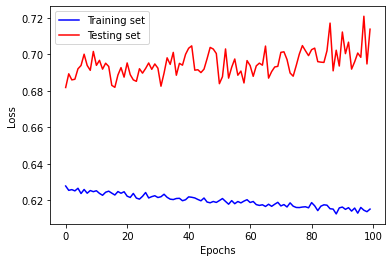

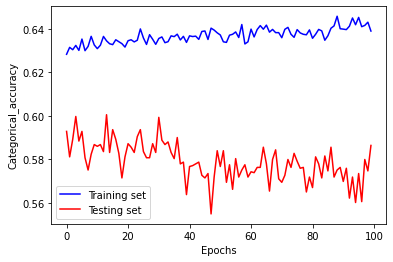

In [37]:
plot_hist_var(hist2, 'loss')
plot_hist_var(hist2, 'categorical_accuracy')

In [38]:
scores2 = model2.evaluate(X_test_scaled, y_test, verbose=1)
print(scores2)

86/86 [==============================] - 5s 56ms/step - loss: 0.8224 - categorical_accuracy: 0.5274
[0.8224222660064697, 0.5274445414543152]


## Benchmarking with Linear Model

In [39]:
from keras.layers import Flatten
def linearModel(input_shape):
    model=Sequential()
    model.add(Flatten(input_shape = input_shape))
    model.add(Dense(2,activation='softmax', use_bias=True))
    adam=tf.keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=[metrics.categorical_accuracy])
    return(model)

model3=linearModel(X_train_scaled.shape[1:])

print(model3.summary())
hist3 = model3.fit(X_train_scaled, y_train,validation_split=0.1, batch_size=1000, epochs=500, shuffle=False,verbose=1)
scores3 = model3.evaluate(X_test_scaled, y_test, verbose=1)
print(scores3)
 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 2000)              0         
_________________________________________________________________
dense_72 (Dense)             (None, 2)                 4002      
Total params: 4,002
Trainable params: 4,002
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/500
23/23 [==============================] - 1s 14ms/step - loss: 0.8976 - categorical_accuracy: 0.4973 - val_loss: 0.7760 - val_categorical_accuracy: 0.4798
Epoch 2/500
23/23 [==============================] - 0s 7ms/step - loss: 0.7745 - categorical_accuracy: 0.5129 - val_loss: 0.7770 - val_categorical_accuracy: 0.5032
Epoch 3/500
23/23 [==============================] - 0s 7ms/step - loss: 0.7709 - categorical_accuracy: 0.5221 - val_loss: 0.8878 - val_categorical_accuracy: 0.5137
Epoch 4/500


86/86 [==============================] - 0s 3ms/step - loss: 0.9112 - categorical_accuracy: 0.4940
[0.9112195372581482, 0.49400219321250916]


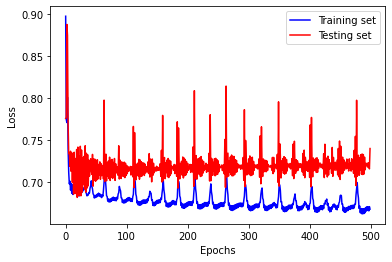

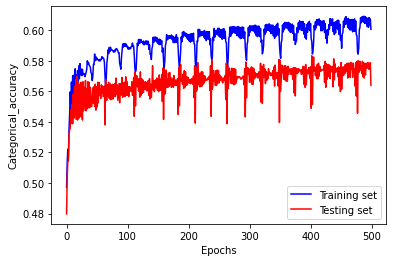

In [40]:
plot_hist_var(hist3, 'loss')
plot_hist_var(hist3, 'categorical_accuracy')
scores3 = model3.evaluate(X_test_scaled, y_test, verbose=1)
print(scores3)

In [41]:
hist3 = model3.fit(X_train_scaled, y_train,validation_split=0.1, batch_size=1000, epochs=500, shuffle=True,verbose=1)
scores3 = model3.evaluate(X_test_scaled, y_test, verbose=1)
print(scores3)

Epoch 1/500
23/23 [==============================] - 0s 10ms/step - loss: 0.6627 - categorical_accuracy: 0.6066 - val_loss: 0.6731 - val_categorical_accuracy: 0.5945
Epoch 2/500
23/23 [==============================] - 0s 8ms/step - loss: 0.6496 - categorical_accuracy: 0.6159 - val_loss: 0.7084 - val_categorical_accuracy: 0.5642
Epoch 3/500
23/23 [==============================] - 0s 7ms/step - loss: 0.6497 - categorical_accuracy: 0.6171 - val_loss: 0.6717 - val_categorical_accuracy: 0.5985
Epoch 4/500
23/23 [==============================] - 0s 8ms/step - loss: 0.6439 - categorical_accuracy: 0.6248 - val_loss: 0.6788 - val_categorical_accuracy: 0.6018
Epoch 5/500
23/23 [==============================] - 0s 8ms/step - loss: 0.6456 - categorical_accuracy: 0.6227 - val_loss: 0.6732 - val_categorical_accuracy: 0.5985
Epoch 6/500
23/23 [==============================] - 0s 9ms/step - loss: 0.6446 - categorical_accuracy: 0.6206 - val_loss: 0.6730 - val_categorical_accuracy: 0.5994
Epoch 7/5

# Future Work

![alt text](https://docs.google.com/uc?export=download&id=1bCjouRta9sqnZBMTMbw_rkm-roQdYr4P)

Figure 10: Performance on 500 new stocks which the model has never seen before. Left: out-of-sample accuracy reported for June-August, 2015. Right: out-of-sample accuracy reported
for January-March, 2017. Universal model trained on data from January 2014-May 2015.

Source: 
[Universal features of price formation in financial markets:
perspectives from Deep Learning](https://arxiv.org/pdf/1803.06917.pdf)

Takeaway Messages:


The successful application of deep learning techniques on the real world problems usually requires the following:
1.   Rich datasets;
2.   Domain knowledge -> ask a "good" data problem
2.   Powerful computing rescouces;
3.   Proper Engineering Machine Learning Pipelines -> Parameter Tuning;
4.   Efficient algorithms.

